# Module 2 Project 

Congratulations on finishing all the coursework for module 2! You have come a long way since you joined Flatiron - you have now learned how to collect data, work with databases, identify & interpret different types of statistical distributions, conduct statistical testing, and tell interesting and meaningful stories from your data. You are now ready to use your newly learned skills to build a statistics project. 

For Mod 2 Project, you are going to collect data, store them in either a CSV or database, conduct exploratory analysis, and conduct a hypothesis testing using the linear models we have learned in this chapter. You may either start with a __question__, or with __data__. For example, you can ask:
- What affect the prices of drugs in the FDA drug database? Is one type of drug significantly more expensive than the other?
- Does body weight, carbs intake, and age have an effect on the blood cholesterol level? What assumptions need to be made or satistified to answer such a question?
- Is anxiety influenced by different types of personality traits? 
- What elements influence retail sales? Is the the time of the day, the day of the week, different types of marketing strategy, or others? Which element is the most important in relation to sales? What strategy would you recommend management if you would like to increase sales?
- Dangerous racial stereotyping leads people to think certain races are "smarter" than others; however, is academic performance of public school students correlated with their demographic profile, or socioeconomic statuses, resources, perceived anxiety, friendship, and mood? What recommendation can you make for education instituitions to foster better learning environment? 

#### Deliverables
- A well-formed hypothesis and the question you are trying to answer 
- Data visualization showing correlations between variables and distributions of data
- Exploratory analysis of your data
- Results of your hypothesis testing with evaluation metrics (R square, coefficients of variables, your model)
- A model with at least **three** distinct independent variables, and **two** engineered features
- Examination of linear model assumptions using visualizations
- A coherent and insightful story

In [ ]:
'https://databank.worldbank.org/data/reports.aspx?source=world-development-indicators#'

How does socioeconomic status affect maternal mortality rates?
    - analyze one year first, look at time later
    - re-select data to include better socio-economic indicators (limit education - related factors)

In [88]:
import pandas as pd

In [89]:
import numpy as np

In [2]:
data = pd.read_csv('World_Data.csv')

In [170]:
data2 = pd.read_csv('World_Data_2.csv')

In [207]:
data3 = pd.read_csv('World_Data_3.csv')

In [311]:
data = pd.concat([data, data2, data3], ignore_index = True)

In [312]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,44.8548851013184,42.7,43.2220189082037,69.1,67.2595520019531,89.5,71.5,84.1371383666992,..,..
1,Afghanistan,AFG,"Children out of school, primary",SE.PRM.UNER,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,..,..,..,..,..,..,...,..,19.9,20.3,13.8,..,..,19.8,..,..,..
3,Afghanistan,AFG,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,..,..,..,..,..,..,...,..,21.8,21.2,..,..,..,22.5,..,..,..
4,Afghanistan,AFG,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,..,..,..,..,..,..,...,..,330,..,..,..,..,1291,..,..,..


In [313]:
data.shape

(28490, 43)

In [314]:
data['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

In [315]:
df = data.drop(['Series Code', 'Country Code'], axis = 1).copy()

In [316]:
df = df.melt(id_vars=['Country Name', 'Series Name'], var_name = 'Year')

In [319]:
df['Year'] = df['Year'].apply(lambda x: int(x.split()[0]))

In [320]:
df['value'] = df['value'].apply(lambda x: float(x) if x != '..' else float('nan'))

In [180]:
#df = df[(df['Year'] > 1999) & (df['Year'] < 2014)]

In [216]:
# df = df[df['Series Name'] != 'Consumption of iodized salt (% of households)']

In [321]:
df['Series Name'].unique()

array(['Access to electricity (% of population)',
       'Children out of school, primary',
       'Contraceptive prevalence, modern methods (% of women ages 15-49)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Lower secondary completion rate, total (% of relevant age group)',
       'Lower secondary completion rate, female (% of relevant age group)',
       'Lower secondary completion rate, male (% of relevant age group)',
       'Compulsory education, duration (years)',
       'Government expenditure on education, total (% of GDP)',
       'Adjusted net enrollment rate, primary (% of primary school age children)',
       'Adjusted net enrollment rate, primary, female (% of primary school age children)',
       'Adjusted net enrollment rate, primary, male (% of primary school age children)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       '

In [322]:
df.head(20)

,Country Name,Series Name,Year,value
0,Afghanistan,Access to electricity (% of population),1980,NaN
1,Afghanistan,"Children out of school, primary",1980,NaN
2,Afghanistan,"Contraceptive prevalence, modern methods (% of...",1980,NaN
3,Afghanistan,"Contraceptive prevalence, any methods (% of wo...",1980,NaN
4,Afghanistan,"Maternal mortality ratio (national estimate, p...",1980,NaN
5,Afghanistan,"Lower secondary completion rate, total (% of r...",1980,13.59561
6,Afghanistan,"Lower secondary completion rate, female (% of ...",1980,5.86268
7,Afghanistan,"Lower secondary completion rate, male (% of re...",1980,20.99409
8,Afghanistan,"Compulsory education, duration (years)",1980,NaN
9,Afghanistan,"Government expenditure on education, total (% ...",1980,1.84093


In [323]:
pivoted = pd.pivot_table(df, index=['Country Name', 'Year'], columns = 'Series Name', values = 'value')

In [324]:
mortality = pivoted[pivoted['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].notnull()].copy()

In [227]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Year,,,,,,,,,,,,,,,,,,,,,
1990,177,64,50,50,183,128,183,183,183,0,...,53,135,9,136,73,42,105,68,5,5
1991,177,62,51,51,183,128,183,183,183,0,...,67,87,10,136,77,52,116,77,4,4
1992,177,64,53,53,183,128,182,182,182,0,...,60,87,21,136,83,47,114,70,11,11
1993,177,63,52,52,183,128,182,182,182,0,...,63,110,19,136,79,51,113,84,7,7
1994,177,76,61,61,183,128,182,182,182,0,...,61,84,11,136,87,40,120,84,5,6
1995,177,71,57,57,183,128,183,183,183,0,...,63,116,19,136,83,46,110,76,8,8
1996,178,73,59,59,183,128,183,183,183,0,...,53,100,19,136,79,40,105,67,10,10
1997,178,61,52,52,183,128,183,183,183,0,...,38,106,26,136,68,19,91,51,10,10
1998,178,66,55,55,183,128,183,183,183,0,...,66,90,26,136,65,58,111,55,10,10


In [228]:
mortality.corr()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Series Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,0.734260,0.746298,0.738435,-0.728398,-0.212927,-0.797122,0.561715,-0.806531,0.511769,...,0.821210,0.662345,0.460341,-0.410307,0.795534,0.680855,-0.824782,-0.654061,-0.469166,-0.661178
"Adjusted net enrollment rate, primary (% of primary school age children)",0.734260,1.000000,0.991979,0.989154,-0.649855,-0.138760,-0.679545,0.433661,-0.679742,0.427251,...,0.591254,0.489749,0.550305,-0.190179,0.871612,0.551821,-0.640728,-0.525818,-0.652806,-0.631142
"Adjusted net enrollment rate, primary, female (% of primary school age children)",0.746298,0.991979,1.000000,0.962721,-0.658723,-0.125259,-0.707884,0.451006,-0.706716,0.452835,...,0.599201,0.514690,0.597424,-0.147185,0.885798,0.583327,-0.661539,-0.546107,-0.661120,-0.637094
"Adjusted net enrollment rate, primary, male (% of primary school age children)",0.738435,0.989154,0.962721,1.000000,-0.632823,-0.130227,-0.678414,0.447343,-0.682123,0.439215,...,0.575339,0.504879,0.493449,-0.207987,0.845254,0.548407,-0.619742,-0.521158,-0.607015,-0.582175
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.728398,-0.649855,-0.658723,-0.632823,1.000000,0.210501,0.798149,-0.541482,0.802340,-0.513768,...,-0.743806,-0.575692,-0.421292,0.299345,-0.720821,-0.628592,0.737550,0.591962,0.684574,0.845927
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,-0.212927,-0.138760,-0.125259,-0.130227,0.210501,1.000000,0.187959,-0.190983,0.204385,-0.089305,...,-0.271654,-0.243056,-0.041920,0.404001,-0.162017,-0.230789,0.224479,0.273708,0.033648,0.124463
Age dependency ratio (% of working-age population),-0.797122,-0.679545,-0.707884,-0.678414,0.798149,0.187959,1.000000,-0.561105,0.971871,-0.528154,...,-0.763005,-0.607551,-0.516448,0.312607,-0.739626,-0.642674,0.778625,0.612577,0.430649,0.661161
"Age dependency ratio, old (% of working-age population)",0.561715,0.433661,0.451006,0.447343,-0.541482,-0.190983,-0.561105,1.000000,-0.740267,0.646894,...,0.548018,0.727174,0.339329,-0.279779,0.429973,0.423960,-0.568129,-0.551957,-0.279280,-0.421536
"Age dependency ratio, young (% of working-age population)",-0.806531,-0.679742,-0.706716,-0.682123,0.802340,0.204385,0.971871,-0.740267,1.000000,-0.640868,...,-0.775060,-0.716129,-0.523556,0.330038,-0.725426,-0.649331,0.798724,0.658023,0.430670,0.656399


In [326]:
mortality.drop(['Contraceptive prevalence, modern methods (% of women ages 15-49)',
       'Lower secondary completion rate, female (% of relevant age group)',
       'Lower secondary completion rate, male (% of relevant age group)',
       'Adjusted net enrollment rate, primary, female (% of primary school age children)',
       'Adjusted net enrollment rate, primary, male (% of primary school age children)',
       'Births attended by skilled health staff (% of total)',
       'Children out of school, primary, female',
       'Children out of school, primary, male',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Persistence to grade 5, total (% of cohort)',
       "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
       'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
       'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)',
       'Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, HepB3 (% of one-year-old children)',
       'Lifetime risk of maternal death (%)',
       'Literacy rate, youth total (% of people ages 15-24)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)'], axis = 1, inplace = True)


In [329]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,"Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)","Average working hours of children, working only, ages 7-14 (hours per week)",Children (0-14) living with HIV,Children (ages 0-14) newly infected with HIV,"Children in employment, total (% of children ages 7-14)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Year,,,,,,,,,,,,,,,,,,,,,
1990,177,64,183,128,183,0,0,94,90,0,...,53,135,9,136,73,42,105,68,5,5
1991,177,62,183,128,183,0,0,94,90,0,...,67,87,10,136,77,52,116,77,4,4
1992,177,64,183,128,182,0,0,94,90,0,...,60,87,21,136,83,47,114,70,11,11
1993,177,63,183,128,182,0,0,94,90,0,...,63,110,19,136,79,51,113,84,7,7
1994,177,76,183,128,182,0,0,94,90,1,...,61,84,11,136,87,40,120,84,5,6
1995,177,71,183,128,183,0,0,94,90,0,...,63,116,19,136,83,46,110,76,8,8
1996,178,73,183,128,183,0,0,94,90,2,...,53,100,19,136,79,40,105,67,10,10
1997,178,61,183,128,183,0,0,94,90,0,...,38,106,26,136,68,19,91,51,10,10
1998,178,66,183,128,183,0,0,94,90,1,...,66,90,26,136,65,58,111,55,10,10


In [330]:
#drop for too little data
mortality.drop(['Average working hours of children, working only, ages 7-14 (hours per week)',
               'Children in employment, total (% of children ages 7-14)',
               'Pregnant women receiving prenatal care (%)',
               'Women who were first married by age 15 (% of women ages 20-24)',
               'Women who were first married by age 18 (% of women ages 20-24)'], axis = 1, inplace = True)


In [331]:
mortality.corr()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,"Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)",Children (0-14) living with HIV,Children (ages 0-14) newly infected with HIV,"Children out of school, primary","Community health workers (per 1,000 people)",...,People using safely managed drinking water services (% of population),People using safely managed sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)","Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary"
Series Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,0.734260,-0.728398,-0.212927,-0.806531,0.511769,-0.225848,-0.254528,-0.239277,0.111116,...,0.756962,0.444121,0.892528,0.821210,0.662345,-0.410307,0.795534,0.680855,-0.824782,-0.654061
"Adjusted net enrollment rate, primary (% of primary school age children)",0.734260,1.000000,-0.649855,-0.138760,-0.679742,0.427251,-0.124083,-0.165292,-0.297678,0.237635,...,0.632013,0.425389,0.652372,0.591254,0.489749,-0.190179,0.871612,0.551821,-0.640728,-0.525818
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.728398,-0.649855,1.000000,0.210501,0.802340,-0.513768,0.168624,0.223370,0.200328,-0.188975,...,-0.718999,-0.653358,-0.693312,-0.743806,-0.575692,0.299345,-0.720821,-0.628592,0.737550,0.591962
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,-0.212927,-0.138760,0.210501,1.000000,0.204385,-0.089305,0.740833,0.876162,0.398016,0.040859,...,-0.405423,-0.148683,-0.286311,-0.271654,-0.243056,0.404001,-0.162017,-0.230789,0.224479,0.273708
"Age dependency ratio, young (% of working-age population)",-0.806531,-0.679742,0.802340,0.204385,1.000000,-0.640868,0.217509,0.252700,0.237407,-0.126995,...,-0.802350,-0.596622,-0.859747,-0.775060,-0.716129,0.330038,-0.725426,-0.649331,0.798724,0.658023
"Automated teller machines (ATMs) (per 100,000 adults)",0.511769,0.427251,-0.513768,-0.089305,-0.640868,1.000000,-0.090641,-0.118666,-0.228172,-0.067505,...,0.598036,0.450667,0.629822,0.497319,0.543822,-0.209705,0.446038,0.424620,-0.520985,-0.464773
Children (0-14) living with HIV,-0.225848,-0.124083,0.168624,0.740833,0.217509,-0.090641,1.000000,0.873907,0.399532,0.017475,...,-0.563127,-0.281800,-0.376060,-0.311166,-0.223922,0.461218,-0.157793,-0.246330,0.250701,0.277723
Children (ages 0-14) newly infected with HIV,-0.254528,-0.165292,0.223370,0.876162,0.252700,-0.118666,0.873907,1.000000,0.390857,-0.009997,...,-0.504843,-0.335525,-0.337630,-0.290361,-0.252851,0.448017,-0.185719,-0.267422,0.239002,0.248705
"Children out of school, primary",-0.239277,-0.297678,0.200328,0.398016,0.237407,-0.228172,0.399532,0.390857,1.000000,0.177668,...,-0.475197,-0.407211,-0.254989,-0.285419,-0.242779,0.028938,-0.262459,-0.218864,0.257685,0.242368


In [332]:
mortality.drop(['Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
               'Children (0-14) living with HIV',
               'Children (ages 0-14) newly infected with HIV',
               'Children out of school, primary',
               'Community health workers (per 1,000 people)',
               'Prevalence of HIV, total (% of population ages 15-49)'], axis = 1, inplace = True)


In [333]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Electric power consumption (kWh per capita),"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",...,"Nurses and midwives (per 1,000 people)",People using safely managed drinking water services (% of population),People using safely managed sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary"
Year,,,,,,,,,,,,,,,,,,,,,
1990,177,64,183,183,0,0,0,14,131,0,...,14,0,0,0,53,135,73,42,105,68
1991,177,62,183,183,0,0,0,23,132,180,...,13,0,0,0,67,87,77,52,116,77
1992,177,64,183,182,0,0,0,30,132,180,...,14,0,0,0,60,87,83,47,114,70
1993,177,63,183,182,0,0,1,29,132,180,...,12,0,0,0,63,110,79,51,113,84
1994,177,76,183,182,0,0,2,22,132,180,...,14,0,0,0,61,84,87,40,120,84
1995,177,71,183,183,0,1,1,39,134,180,...,20,0,0,0,63,116,83,46,110,76
1996,178,73,183,183,0,1,3,39,134,180,...,18,0,0,0,53,100,79,40,105,67
1997,178,61,183,183,0,7,1,37,134,180,...,25,0,0,0,38,106,68,19,91,51
1998,178,66,183,183,0,136,4,34,134,180,...,27,0,0,0,66,90,65,58,111,55


In [335]:
mortality.columns

Index(['Access to electricity (% of population)',
       'Adjusted net enrollment rate, primary (% of primary school age children)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio, young (% of working-age population)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'Consumption of iodized salt (% of households)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Electric power consumption (kWh per capita)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Exclusive breastfeeding (% of children under 6 months)',
       'Female genital mutilation prevalence (%)', 'GDP (constant 2010 US$)',
       'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)',
       'Government expenditure on education, total (% of GDP)',
       'Immunization, measles (% of children ages 12-23 months)',
       'I

In [336]:
mortality = mortality[['Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'Consumption of iodized salt (% of households)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Exclusive breastfeeding (% of children under 6 months)',
       'GDP per capita (constant 2010 US$)',
       'Government expenditure on education, total (% of GDP)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Low-birthweight babies (% of births)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Mobile cellular subscriptions (per 100 people)',
       'Physicians (per 1,000 people)',
       'Pupil-teacher ratio, primary']]

In [337]:
mortality.corr()

Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Series Name,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,-0.728398,0.511769,0.394465,0.254018,0.744350,-0.084665,0.452554,0.163871,0.624159,0.465950,0.775576,-0.549785,-0.826534,0.420549,0.662345,-0.824782
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.728398,1.000000,-0.513768,-0.315681,-0.208776,-0.622679,-0.213190,-0.495687,-0.256501,-0.598474,-0.470042,-0.643690,0.513690,0.742792,-0.389059,-0.575692,0.737550
"Automated teller machines (ATMs) (per 100,000 adults)",0.511769,-0.513768,1.000000,0.283226,0.163861,0.486144,-0.050062,0.604833,0.177310,0.358415,0.732708,0.538000,-0.347821,-0.490435,0.507722,0.543822,-0.520985
"Compulsory education, duration (years)",0.394465,-0.315681,0.283226,1.000000,0.054661,0.325695,0.031000,0.228259,0.207105,0.306204,0.337349,0.308099,-0.219208,-0.342738,0.317229,0.352615,-0.328742
Consumption of iodized salt (% of households),0.254018,-0.208776,0.163861,0.054661,1.000000,0.399348,0.277299,0.161699,-0.031599,0.352628,0.105756,0.331424,-0.344539,-0.238921,0.013186,0.245186,-0.157479
"Contraceptive prevalence, any methods (% of women ages 15-49)",0.744350,-0.622679,0.486144,0.325695,0.399348,1.000000,0.081645,0.428124,0.141599,0.618877,0.394696,0.768917,-0.544205,-0.734974,0.283942,0.470104,-0.677904
Exclusive breastfeeding (% of children under 6 months),-0.084665,-0.213190,-0.050062,0.031000,0.277299,0.081645,1.000000,-0.064274,-0.011300,0.266207,0.056239,0.059082,-0.120970,-0.130544,0.111888,-0.062770,0.036345
GDP per capita (constant 2010 US$),0.452554,-0.495687,0.604833,0.228259,0.161699,0.428124,-0.064274,1.000000,0.241662,0.286764,0.593994,0.397965,-0.279221,-0.387888,0.378593,0.430756,-0.508362
"Government expenditure on education, total (% of GDP)",0.163871,-0.256501,0.177310,0.207105,-0.031599,0.141599,-0.011300,0.241662,1.000000,0.237225,0.233734,0.257502,-0.170189,-0.220772,0.131119,0.346830,-0.284448


In [338]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Year,,,,,,,,,,,,,,,,,
1990,177,183,0,0,0,14,4,155,46,152,180,16,2,184,180,135,105
1991,177,183,0,0,0,23,5,156,49,153,37,24,3,184,176,87,116
1992,177,183,0,0,0,30,9,158,51,171,48,9,8,184,177,87,114
1993,177,183,0,0,1,29,11,159,55,175,62,4,5,184,177,110,113
1994,177,183,0,0,2,22,7,161,66,176,84,10,6,184,177,84,120
1995,177,183,0,1,1,39,13,170,76,176,125,5,8,184,178,116,110
1996,178,183,0,1,3,39,20,171,76,176,154,8,21,184,178,100,105
1997,178,183,0,7,1,37,13,172,35,176,166,3,12,184,177,106,91
1998,178,183,0,136,4,34,17,172,83,176,171,6,24,184,178,90,111


In [339]:
mortality = mortality.swaplevel(0, 1, axis=0)

In [340]:
mortality = mortality.reset_index()

In [341]:
mortality[mortality['Country Name'] == 'United States']

Series Name,Year,Country Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
4498,1990,United States,100.0,57.0788,NaN,NaN,NaN,70.7,NaN,36312.414183,NaN,90.0,0.784729,NaN,NaN,12.0,2.092051,1.800,NaN
4499,1991,United States,100.0,58.3454,NaN,NaN,NaN,NaN,NaN,35803.868421,NaN,87.0,1.163194,NaN,NaN,12.0,2.963880,1.900,NaN
4500,1992,United States,100.0,59.6120,NaN,NaN,NaN,NaN,NaN,36566.173770,NaN,83.0,1.724203,NaN,NaN,12.0,4.285325,1.900,NaN
4501,1993,United States,100.0,57.9556,NaN,NaN,NaN,NaN,NaN,37078.049684,NaN,84.0,2.271673,NaN,NaN,12.0,6.157007,1.900,16.09671
4502,1994,United States,100.0,56.2992,NaN,NaN,NaN,NaN,NaN,38104.972468,NaN,89.0,4.862781,NaN,NaN,12.0,9.185612,NaN,16.08709
4503,1995,United States,100.0,54.6428,NaN,NaN,NaN,76.4,NaN,38677.715088,NaN,88.0,9.237088,NaN,NaN,12.0,12.717687,2.428,16.17298
4504,1996,United States,100.0,52.9864,NaN,NaN,NaN,NaN,NaN,39681.519858,NaN,91.0,16.419353,NaN,NaN,11.0,16.384833,2.000,16.03388
4505,1997,United States,100.0,51.3300,NaN,NaN,NaN,NaN,NaN,40965.846645,NaN,91.0,21.616401,NaN,NaN,11.0,20.325198,2.100,NaN
4506,1998,United States,100.0,49.7042,NaN,13.0,NaN,NaN,NaN,42292.891201,NaN,92.0,30.093197,NaN,NaN,11.0,25.117466,2.100,15.67606
4507,1999,United States,100.0,48.0784,NaN,13.0,NaN,NaN,NaN,43768.884993,NaN,92.0,35.848724,NaN,NaN,12.0,30.856451,2.200,15.41492


In [342]:
mortality = mortality[mortality['Country Name'] != 'World']

In [343]:
mortality.groupby('Country Name').count()

Series Name,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,26,26,26,12,18,2,8,2,14,6,26,16,1,0,26,26,14,14
Albania,26,26,26,12,18,2,4,4,26,16,26,22,4,4,26,26,17,12
Algeria,26,26,26,12,18,1,7,3,26,1,26,23,3,2,26,26,8,25
Angola,26,26,26,12,18,1,3,1,26,5,26,21,2,1,26,26,4,7
Argentina,26,26,26,12,18,1,4,2,26,20,26,25,10,9,26,26,9,13
Armenia,26,26,26,12,17,1,4,3,26,18,24,23,2,4,26,26,21,13
Australia,26,26,26,12,18,0,6,0,26,19,26,23,0,2,26,26,20,8
Austria,26,26,26,12,18,0,3,0,26,24,26,26,0,2,26,26,22,24
Azerbaijan,26,26,26,10,18,1,4,3,26,21,24,21,9,3,26,26,21,25


In [344]:
test_data = mortality[mortality['Year'] == 2010].copy()

In [345]:
test_data.columns

Index(['Year', 'Country Name', 'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'Consumption of iodized salt (% of households)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Exclusive breastfeeding (% of children under 6 months)',
       'GDP per capita (constant 2010 US$)',
       'Government expenditure on education, total (% of GDP)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Low-birthweight babies (% of births)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Mobile cellular subscriptions (per 100 people)',
       'Physicians (per 1,000 people)', 'Pupil-teacher ratio, 

In [352]:
test_data = test_data[['Year', 'Country Name', 
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'GDP per capita (constant 2010 US$)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Pupil-teacher ratio, primary']]

In [353]:
test_data.drop('Year',axis=1).corr()

Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",GDP per capita (constant 2010 US$),"Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Maternal mortality ratio (modeled estimate, per 100,000 live births)","Pupil-teacher ratio, primary"
Series Name,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,-0.545139,-0.288816,-0.494130,-0.566363,-0.646016,0.765466,0.741198
"Automated teller machines (ATMs) (per 100,000 adults)",-0.545139,1.000000,0.252904,0.608190,0.353102,0.747664,-0.501663,-0.556065
"Compulsory education, duration (years)",-0.288816,0.252904,1.000000,0.263691,0.225291,0.355108,-0.322481,-0.347911
GDP per capita (constant 2010 US$),-0.494130,0.608190,0.263691,1.000000,0.259202,0.815698,-0.410274,-0.501976
"Immunization, measles (% of children ages 12-23 months)",-0.566363,0.353102,0.225291,0.259202,1.000000,0.449783,-0.593406,-0.501623
Individuals using the Internet (% of population),-0.646016,0.747664,0.355108,0.815698,0.449783,1.000000,-0.619359,-0.716882
"Maternal mortality ratio (modeled estimate, per 100,000 live births)",0.765466,-0.501663,-0.322481,-0.410274,-0.593406,-0.619359,1.000000,0.835119
"Pupil-teacher ratio, primary",0.741198,-0.556065,-0.347911,-0.501976,-0.501623,-0.716882,0.835119,1.000000


In [354]:
test_data.columns = ['Year', 'Country','Teen_fertility','ATMs','Compulsory_Ed','GDP_pc','Immunization_measles',
       'Internet_use','Maternal_mort_ratio','Pupil_teacher_ratio']

In [355]:
test_data.head()

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
20,2010,Afghanistan,98.6322,0.532064,9.0,550.514974,62.0,4.0,584.0,44.41709
46,2010,Albania,19.8208,34.136791,8.0,4094.360204,99.0,45.0,30.0,19.70208
72,2010,Algeria,10.8084,5.895808,10.0,4463.394675,95.0,12.5,147.0,23.32803
98,2010,Angola,172.0946,10.467709,6.0,3585.905553,67.0,2.8,561.0,45.58651
124,2010,Argentina,63.8792,41.907589,13.0,10276.260498,95.0,45.0,58.0,NaN


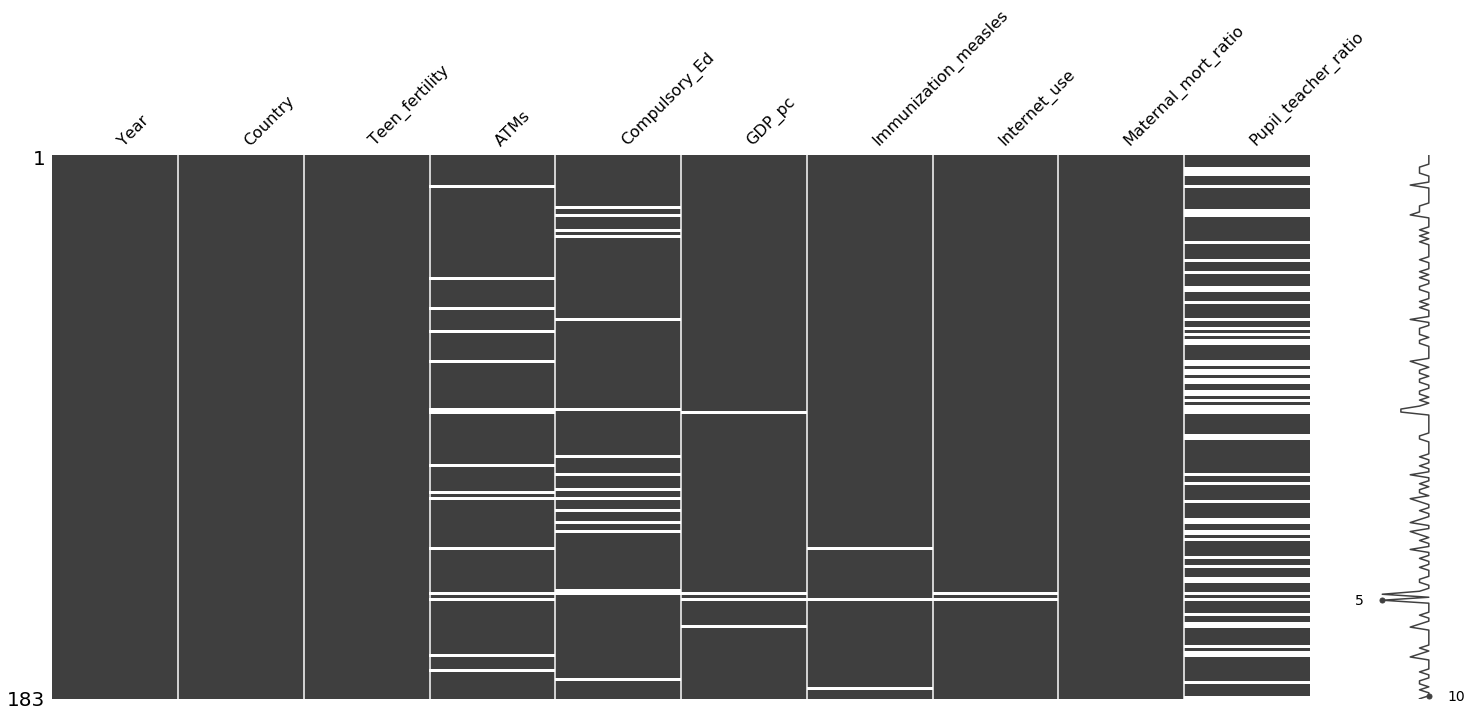

In [356]:
import missingno as msno
%matplotlib inline
msno.matrix(test_data.iloc[:,:])

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

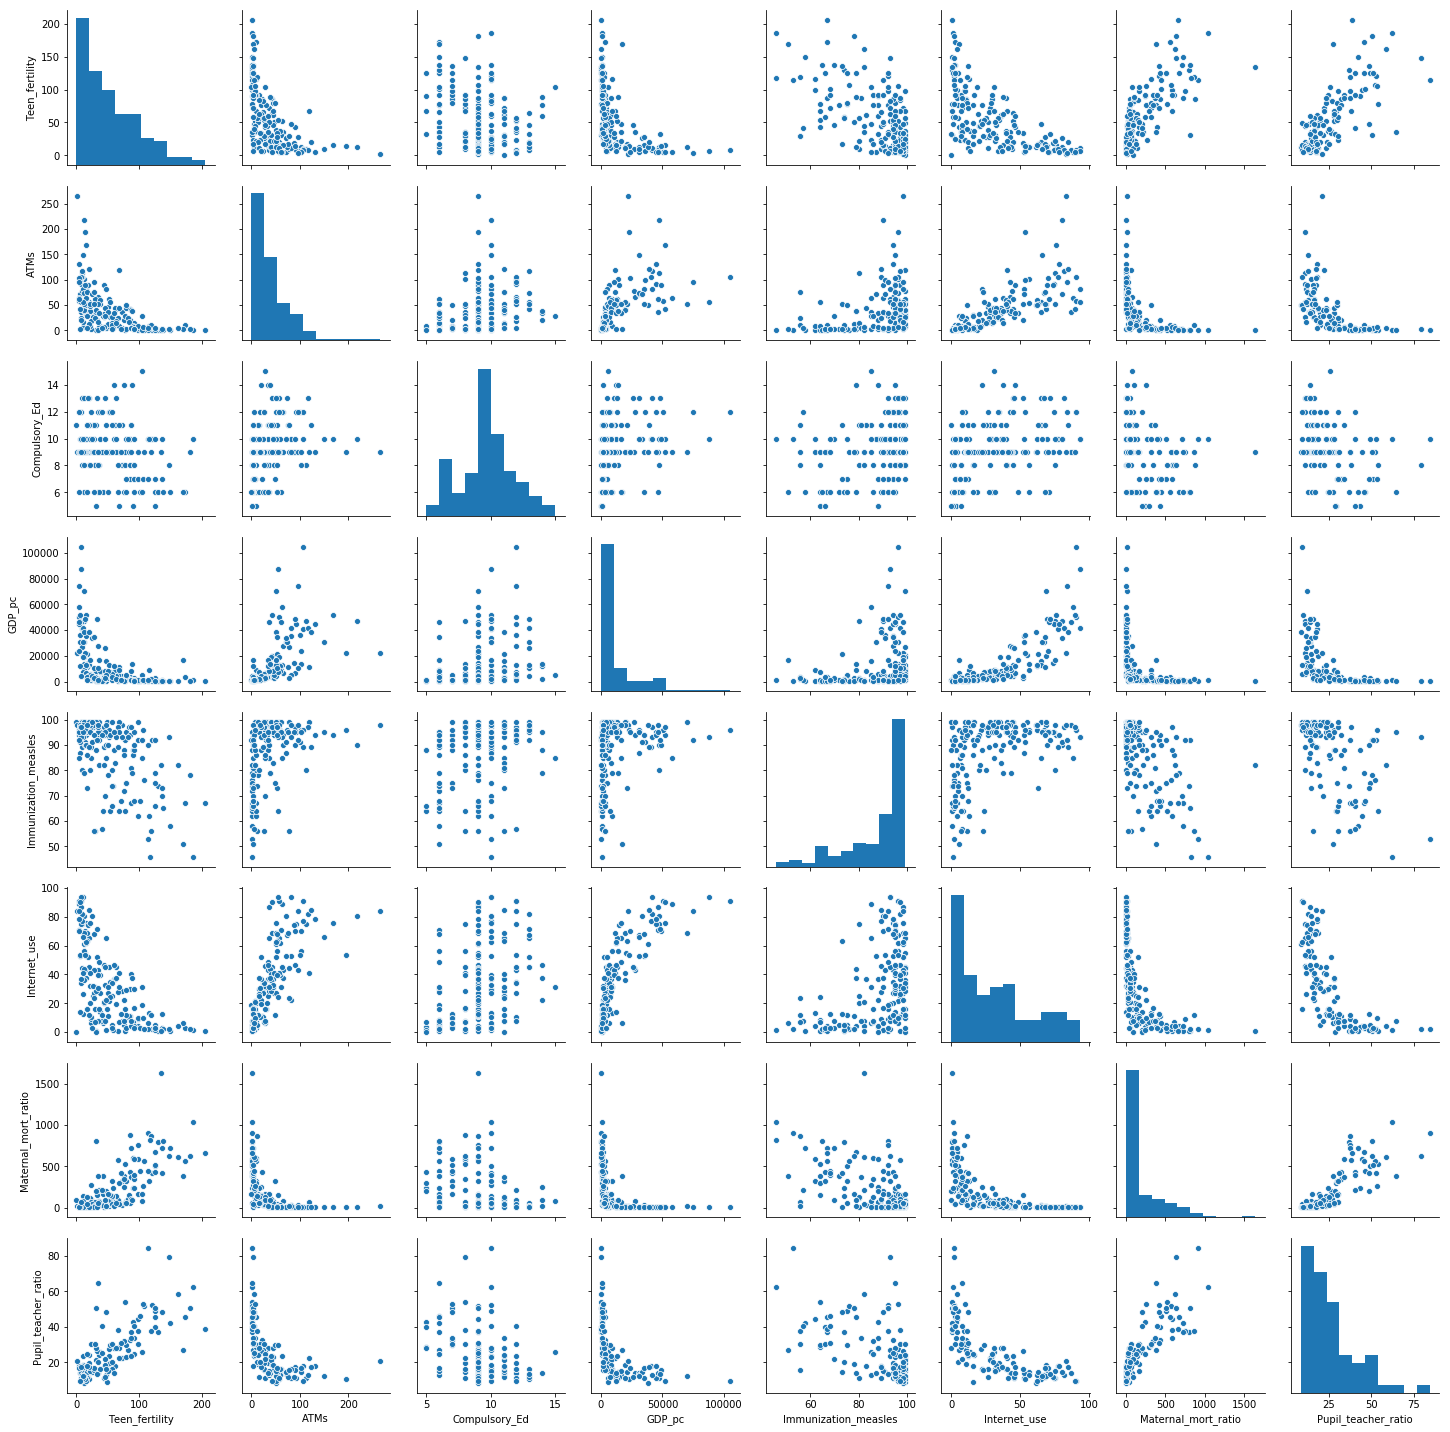

In [358]:
sns.pairplot(test_data.drop('Year', axis = 1))

In [359]:
test_data['Maternal_mort_ratio'].describe()

count     183.000000
mean      194.338798
std       265.671169
min         3.000000
25%        16.000000
50%        59.000000
75%       305.500000
max      1630.000000
Name: Maternal_mort_ratio, dtype: float64

In [361]:
test_data[test_data['Maternal_mort_ratio'] == 1630]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
3712,2010,Sierra Leone,134.3892,0.386752,9.0,399.154368,82.0,0.58,1630.0,NaN


In [363]:
test_data.sort_values('Maternal_mort_ratio', ascending = False).head(15)

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
3712,2010,Sierra Leone,134.3892,0.386752,9.0,399.154368,82.0,0.58,1630.0,NaN
826,2010,Chad,185.3640,0.425380,10.0,896.569734,46.0,1.70,1040.0,62.20393
800,2010,Central African Republic,114.8780,0.664211,10.0,446.443688,53.0,2.00,909.0,84.32027
3894,2010,South Sudan,86.1788,NaN,8.0,NaN,NaN,NaN,876.0,NaN
3140,2010,Nigeria,119.5004,11.219582,9.0,2291.360013,56.0,11.50,867.0,37.55319
3842,2010,Somalia,117.0854,NaN,NaN,NaN,46.0,NaN,820.0,NaN
2464,2010,Liberia,137.1728,1.475385,6.0,506.063005,65.0,2.30,811.0,NaN
670,2010,Burundi,31.2920,0.510020,NaN,231.795537,92.0,1.00,808.0,50.60210
956,2010,"Congo, Dem. Rep.",129.9144,0.405734,6.0,334.231703,74.0,0.72,794.0,37.01310
1554,2010,"Gambia, The",97.9730,NaN,9.0,562.483782,92.0,9.20,753.0,37.48167


In [364]:
test_data.drop('Pupil_teacher_ratio', axis = 1, inplace = True)

In [365]:
test_data.drop(3712, inplace = True)

In [366]:
test_data.sort_values('Maternal_mort_ratio', ascending = False).head(15)

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio
826,2010,Chad,185.3640,0.425380,10.0,896.569734,46.0,1.70,1040.0
800,2010,Central African Republic,114.8780,0.664211,10.0,446.443688,53.0,2.00,909.0
3894,2010,South Sudan,86.1788,NaN,8.0,NaN,NaN,NaN,876.0
3140,2010,Nigeria,119.5004,11.219582,9.0,2291.360013,56.0,11.50,867.0
3842,2010,Somalia,117.0854,NaN,NaN,NaN,46.0,NaN,820.0
2464,2010,Liberia,137.1728,1.475385,6.0,506.063005,65.0,2.30,811.0
670,2010,Burundi,31.2920,0.510020,NaN,231.795537,92.0,1.00,808.0
956,2010,"Congo, Dem. Rep.",129.9144,0.405734,6.0,334.231703,74.0,0.72,794.0
1554,2010,"Gambia, The",97.9730,NaN,9.0,562.483782,92.0,9.20,753.0
2724,2010,Mauritania,87.1080,NaN,9.0,1201.756291,67.0,4.00,723.0


In [367]:
test_data['Maternal_mort_ratio'].describe()

count     182.000000
mean      186.450549
std       243.969533
min         3.000000
25%        16.000000
50%        59.000000
75%       289.250000
max      1040.000000
Name: Maternal_mort_ratio, dtype: float64